## Amazon Reviews Exploratory Data Analysis

In [ ]:
import pandas as pd

df = pd.read_csv("test.csv",header=None)
df.columns = ['Rating', 'Title', 'Review']
df.head(10)

,Rating,Title,Review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
5,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
6,1,Incorrect Disc,"I love the style of this, but after a couple y..."
7,1,DVD menu select problems,I cannot scroll through a DVD menu that is set...
8,2,Unique Weird Orientalia from the 1930's,"Exotic tales of the Orient from the 1930's. ""D..."
9,1,"Not an ""ultimate guide""","Firstly,I enjoyed the format and tone of the b..."


### Check Dataset Basic Info

In [2]:
# Get basic information about the dataset
df.info()

# Summary statistics (Note: Only numeric columns are summarized by default)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  400000 non-null  int64 
 1   Title   399976 non-null  object
 2   Review  400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


(400000, 3)

### Check For Duplicates

In [3]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display the duplicated records
print(f"Number of duplicate records: {len(duplicates)}")
if len(duplicates) > 0:
    print(duplicates)
else:
    print("No duplicate records found.")

Number of duplicate records: 0
No duplicate records found.


### Check for Missing Values

In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


Rating     0
Title     24
Review     0
dtype: int64


### Remove Missing Value

In [5]:
df = df.dropna()
missing_values = df.isnull().sum()
print(missing_values)

Rating    0
Title     0
Review    0
dtype: int64


## Set labels to 0 and 1

In [6]:
def decrease_label_by_one(label):
    return label - 1

df['Rating'] = df['Rating'].apply(decrease_label_by_one)

### Check Rating Distribution

In [7]:
df.Rating.value_counts(normalize = True)


Rating
1    0.50001
0    0.49999
Name: proportion, dtype: float64

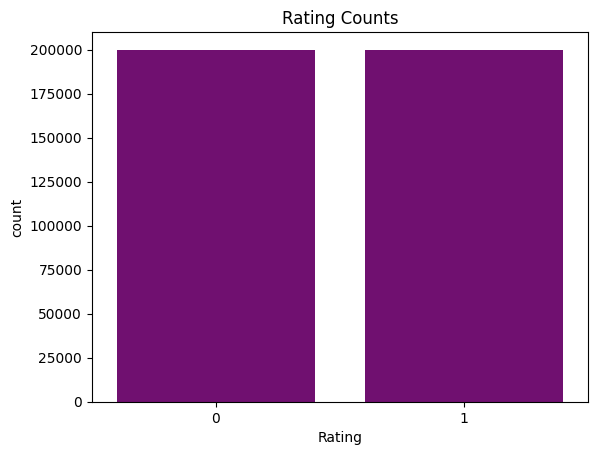

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = ['purple', 'cyan']
sns.set_palette(color_palette) 
sns.countplot(x=df['Rating'])

plt.title('Rating Counts')
plt.show()

### Check Review Length Distribution

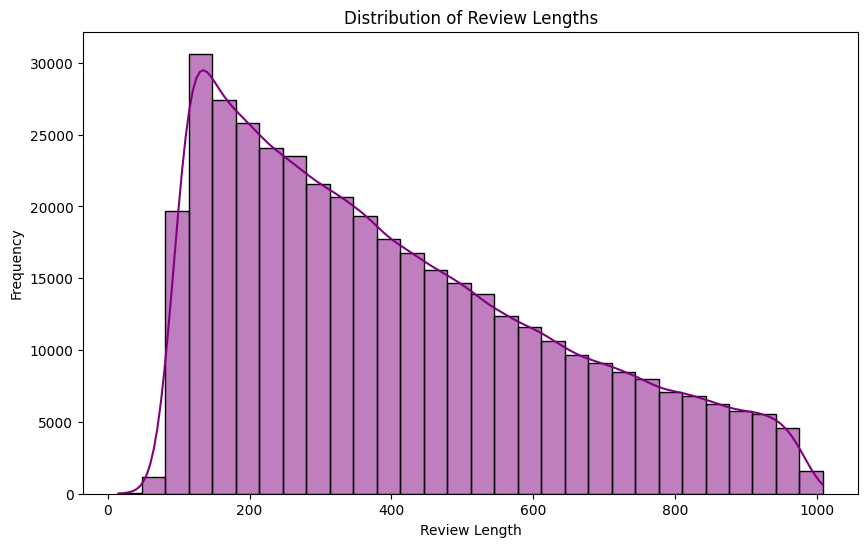

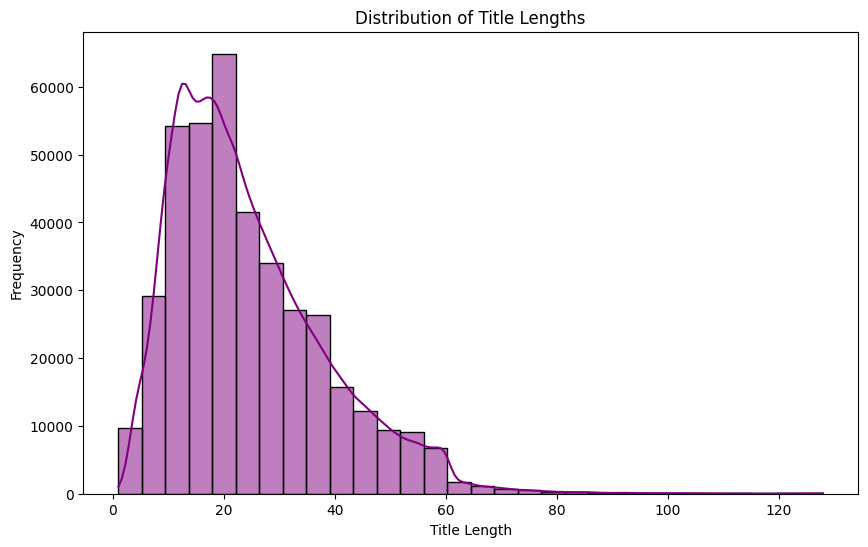

In [9]:
# Calculate the length of each review
df['review_length'] = df['Review'].apply(len)

# Calculate the length of each title
df['title_length'] = df['Title'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], bins=30, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


### Check for Emojis

In [10]:
from collections import Counter
import emoji

# Function to extract emojis from text
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# ---- For Review ----
all_emojis_review = df['Review'].astype(str).apply(extract_emojis).sum()
emoji_counts_review = Counter(all_emojis_review)
emoji_df_review = pd.DataFrame(emoji_counts_review.most_common(), columns=['emoji', 'count'])

# ---- For Title ----
all_emojis_title = df['Title'].astype(str).apply(extract_emojis).sum()
emoji_counts_title = Counter(all_emojis_title)
emoji_df_title = pd.DataFrame(emoji_counts_title.most_common(), columns=['emoji', 'count'])

# Display top 10 from each
print("Top 10 Emojis in Reviews:")
print(emoji_df_review.head(10))

print("\nTop 10 Emojis in Titles:")
print(emoji_df_title.head(10))


Top 10 Emojis in Reviews:
  emoji  count
0     ♥      2

Top 10 Emojis in Titles:
  emoji  count
0     ♥      1


### Cleaning special characters, emojis, numbers, and punctuations

In [11]:
import re
# Data Cleaning - Remain only pure texts
def advanced_cleaning(text):
    # Remove special characters, emojis, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply advanced cleaning
df["Review"] = df["Review"].apply(advanced_cleaning)
df["Title"] = df["Title"].apply(advanced_cleaning)

In [12]:
from collections import Counter
import emoji

# Function to extract emojis from text
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

# ---- For Review ----
all_emojis_review = df['Review'].astype(str).apply(extract_emojis).sum()
emoji_counts_review = Counter(all_emojis_review)
emoji_df_review = pd.DataFrame(emoji_counts_review.most_common(), columns=['emoji', 'count'])

# ---- For Title ----
all_emojis_title = df['Title'].astype(str).apply(extract_emojis).sum()
emoji_counts_title = Counter(all_emojis_title)
emoji_df_title = pd.DataFrame(emoji_counts_title.most_common(), columns=['emoji', 'count'])

# Display top 10 from each
print("Top 10 Emojis in Reviews:")
print(emoji_df_review.head(10))

print("\nTop 10 Emojis in Titles:")
print(emoji_df_title.head(10))


Top 10 Emojis in Reviews:
Empty DataFrame
Columns: [emoji, count]
Index: []

Top 10 Emojis in Titles:
Empty DataFrame
Columns: [emoji, count]
Index: []


### Check for Abbreviations

Top abbreviations for review
   Abbreviation  Count
8             u   2895
1             y   1605
9             r   1304
5             k    840
2            bc    699
3           lol    658
18          cuz    482
0           tho    304
15          btw    285
4          asap    257

Top abbreviations for title
   Abbreviation  Count
3             u    245
1             r    142
2           omg    120
4             k     95
7           wtf     77
11            y     71
6           lol     54
13          pic     21
8            bc     19
10          fyi     14


C:\Users\imand\AppData\Local\Temp\ipykernel_4920\722912750.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Abbreviation', data=review_abbreviation_df.head(20), palette='viridis')


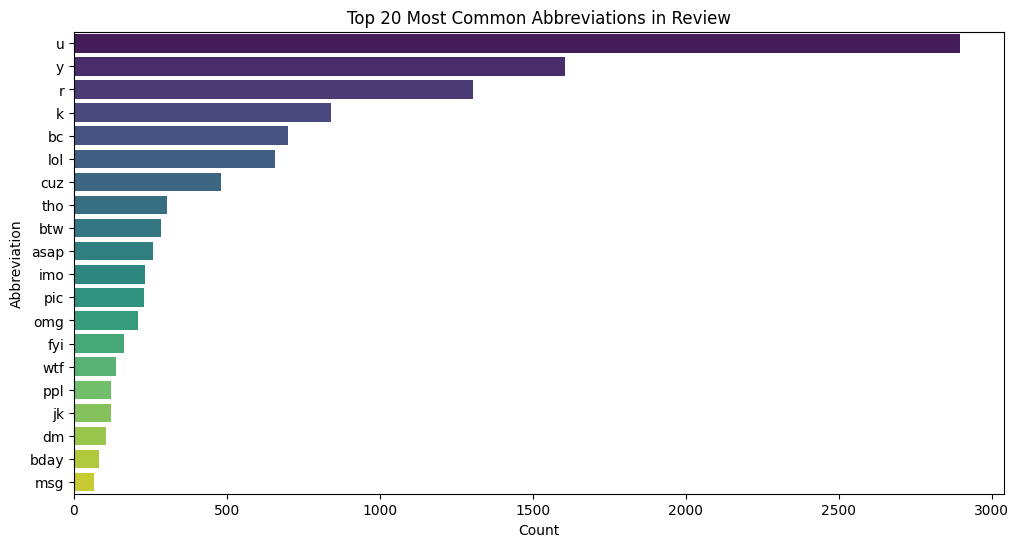

C:\Users\imand\AppData\Local\Temp\ipykernel_4920\722912750.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Abbreviation', data=title_abbreviation_df.head(20), palette='viridis')


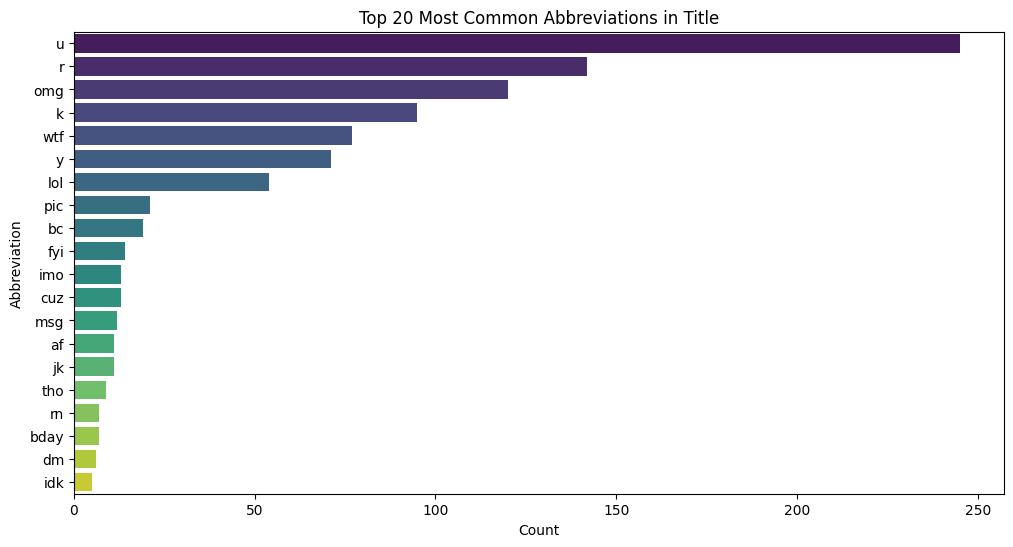

In [13]:
import re
from collections import Counter

# List of common abbreviations
common_abbreviations = set([
    "u", "btw", "omg", "idk", "lol", "brb", "smh", "wtf", "imo", "tbh", "tbt", "r",
    "ikr", "af", "bae", "bff", "nvm", "thx", "gr8", "lmk", "ily", "fyi", "bc", "rn", "yolo", 
    "ftw", "lmao", "np", "omw", "ppl", "plz", "rofl", "thx", "y", "b4", "asap", "cuz", "bday", 
    "idc", "fomo", "wyd", "jk", "bff", "btw", "dm", "tldr", "gg", "irl", "atm", "bc", "cba", 
    "imo", "irl", "jsyk", "k", "msg", "nvm", "obv", "omg", "pic", "ppl", "rn", "srs", "tbh", 
    "tho", "tmi", "ttyl", "txt", "u", "w/", "w/o", "y", "yolo", "zzz"
])

# Function to find abbreviations in text
def find_abbreviations(text):
    # Find all words in the text
    words = re.findall(r'\b\w+\b', text.lower())
    # Filter the words to only those in the common_abbreviations set
    abbreviations = [word for word in words if word in common_abbreviations]
    return abbreviations

# Apply the function to the Review and Title column flatten the list of lists
review_abbreviation_list = df['Review'].apply(find_abbreviations).sum()
title_abbreviation_list = df['Title'].apply(find_abbreviations).sum()

# Count the occurrences of each abbreviation
review_abbreviation_counts = Counter(review_abbreviation_list)
title_abbreviation_counts = Counter(title_abbreviation_list)

# Convert to DataFrame for better visualization
review_abbreviation_df = pd.DataFrame(review_abbreviation_counts.items(), columns=['Abbreviation', 'Count']).sort_values(by='Count', ascending=False)
title_abbreviation_df = pd.DataFrame(title_abbreviation_counts.items(), columns=['Abbreviation', 'Count']).sort_values(by='Count', ascending=False)


# Display the top abbreviations
print("Top abbreviations for review")
print(review_abbreviation_df.head(10))
print("\nTop abbreviations for title")
print(title_abbreviation_df.head(10))

# Optionally, plot the top abbreviations
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Abbreviation', data=review_abbreviation_df.head(20), palette='viridis')
plt.title('Top 20 Most Common Abbreviations in Review')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Abbreviation', data=title_abbreviation_df.head(20), palette='viridis')
plt.title('Top 20 Most Common Abbreviations in Title')
plt.show()




### Identify common abbreviations exist in the dataset

In [14]:
# Identify abbreviations exist in the dataset
import pandas as pd

def identify_slangs_and_abbreviations(df, column_name):
    common_abbreviations = set([ # some most common abbreviations
        "u", "btw", "omg", "idk", "lol", "brb", "smh", "wtf", "imo", "tbh", "tbt", "r",
        "ikr", "af", "bae", "bff", "nvm", "thx", "gr8", "lmk", "ily", "fyi", "bc", "rn", "yolo", 
        "ftw", "lmao", "np", "omw", "ppl", "plz", "rofl", "thx", "y", "b4", "asap", "cuz", "bday", 
        "idc", "fomo", "wyd", "jk", "bff", "btw", "dm", "tldr", "gg", "irl", "atm", "bc", "cba", 
        "imo", "irl", "jsyk", "k", "msg", "nvm", "obv", "omg", "pic", "ppl", "rn", "srs", "tbh", 
        "tho", "tmi", "ttyl", "txt", "u", "w/", "w/o", "y", "yolo", "zzz"
    ])
    
    found_abbreviations = set()
    
    for text in df[column_name]:
        words = str(text).lower().split()  # Convert to string and split
        abbreviations = set(word for word in words if word in common_abbreviations)
        found_abbreviations.update(abbreviations)  # Add to the set
        
    return found_abbreviations

abb_found_review = identify_slangs_and_abbreviations(df, "Review")
abb_found_title = identify_slangs_and_abbreviations(df, "Title")
print("Abbreviations exist in Review")
print(abb_found_review)
print("\nAbbreviations exist in Title")
print(abb_found_title)

Abbreviations exist in Review
{'bday', 'fyi', 'bae', 'ttyl', 'ppl', 'bc', 'omg', 'rn', 'thx', 'lol', 'lmao', 'wtf', 'bff', 'r', 'ily', 'cuz', 'tho', 'pic', 'srs', 'dm', 'rofl', 'txt', 'obv', 'jk', 'btw', 'idk', 'zzz', 'k', 'tldr', 'plz', 'cba', 'msg', 'af', 'gg', 'u', 'ftw', 'asap', 'smh', 'np', 'nvm', 'y', 'imo', 'tmi', 'atm', 'lmk'}

Abbreviations exist in Title
{'bday', 'fyi', 'imo', 'ttyl', 'ppl', 'bc', 'omg', 'rn', 'thx', 'lol', 'lmao', 'wtf', 'r', 'cuz', 'brb', 'pic', 'tho', 'srs', 'dm', 'rofl', 'txt', 'jk', 'btw', 'idk', 'zzz', 'k', 'plz', 'msg', 'af', 'gg', 'u', 'ftw', 'smh', 'asap', 'np', 'y', 'bff', 'tmi', 'atm'}


### Expand abbreviations found

In [15]:
# Expand abbreviations identified
def expand_abbreviations(text):
    # Dictionary mapping abbreviations to their full forms
    abbreviations = {
    "r":"are",    
    "u": "you",
    "btw": "by the way",
    "omg": "oh my god",
    "idk": "I don't know",
    "lol": "laugh out loud",
    "brb": "be right back",
    "smh": "shaking my head",
    "wtf": "what the fuck",
    "imo": "in my opinion",
    "tbh": "to be honest",
    "tbt": "throwback Thursday",
    "ikr": "I know, right",
    "af": "as fuck",
    "bae": "before anyone else",
    "bff": "best friends forever",
    "nvm": "never mind",
    "thx": "thanks",
    "gr8": "great",
    "lmk": "let me know",
    "ily": "I love you",
    "fyi": "for your information",
    "bc": "because",
    "rn": "right now",
    "yolo": "you only live once",
    "ftw": "for the win",
    "lmao": "laughing my ass off",
    "np": "no problem",
    "omw": "on my way",
    "ppl": "people",
    "plz": "please",
    "rofl": "rolling on the floor laughing",
    "b4": "before",
    "asap": "as soon as possible",
    "cuz": "because",
    "bday": "birthday",
    "idc": "I don't care",
    "fomo": "fear of missing out",
    "wyd": "what are you doing",
    "jk": "just kidding",
    "dm": "direct message",
    "tldr": "too long; didn't read",
    "gg": "good game",
    "irl": "in real life",
    "atm": "at the moment",
    "cba": "can't be arsed",
    "jsyk": "just so you know",
    "k": "okay",
    "msg": "message",
    "obv": "obviously",
    "pic": "picture",
    "srs": "serious",
    "tho": "though",
    "tmi": "too much information",
    "ttyl": "talk to you later",
    "txt": "text",
    "w/": "with",
    "w/o": "without",
    "zzz": "sleepy",
    "lmk": "let me know",
    "bffl": "best friends for life",
    "fwiw": "for what it's worth",
    "hmu": "hit me up",
    "l8r": "later",
    "nbd": "no big deal",
    "plz": "please",
    "rsvp": "répondez s'il vous plaît",
    "s/o": "shout out",
    "tbh": "to be honest",
    "tl;dr": "too long; didn't read",
    "y": "why",
    "yw": "you're welcome"
    # Add any additional abbreviations if necessary
}
    
    # Lowercase + find words (alphanumeric only)
    words = re.findall(r'\b\w+\b', str(text).lower())
    
    # Replace known abbreviations
    expanded_words = [abbreviations.get(word, word) for word in words]
    
    #Expand abbreviations in the text
    return ' '.join(expanded_words)

df["Review"] = df["Review"].apply(expand_abbreviations)
df["Title"] = df["Title"].apply(expand_abbreviations)

abb_found_review = identify_slangs_and_abbreviations(df, "Review")
abb_found_title = identify_slangs_and_abbreviations(df, "Title")
print("Abbreviations exist in Review")
print(abb_found_review)
print("\nAbbreviations exist in Title")
print(abb_found_title)

Abbreviations exist in Review
set()

Abbreviations exist in Title
set()


### Check for Other Languages

In [16]:
import swifter

from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Ensure the language detection is deterministic
DetectorFactory.seed = 0

# Function to detect language with exception handling
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Apply the language detection function to the dataset
df['language_Review'] = df['Review'].swifter.apply(detect_language)
df['language_Title'] = df['Title'].swifter.apply(detect_language)


# Display the distribution of languages in the dataset
language_distribution_Review = df['language_Review'].value_counts()
print("Language distribution of Review")
print(language_distribution_Review)

language_distribution_Title = df['language_Title'].value_counts()
print("\nLanguage distribution of Title")
print(language_distribution_Title)

# Optional: Display Review that are not in English
non_english_Review = df[df['language_Review'] != 'en']
print("\nExample Review that are not in English")
print(non_english_Review[['Review', 'language_Review']].head())

non_english_Title = df[df['language_Title'] != 'en']
print("\nExample Title that are not in English")
print(non_english_Title[['Review', 'language_Title']].head())


C:\Users\imand\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pandas Apply: 100%|██████████| 399976/399976 [1:10:50<00:00, 94.09it/s] 


Language distribution of Review
language_Review
en         398980
es            768
fr             78
pt             27
it             22
de             16
af             10
nl             10
so              8
ca              7
da              6
no              6
pl              6
cy              5
id              5
hr              3
tl              3
sl              3
hu              2
sq              2
ro              2
sv              1
lt              1
tr              1
sk              1
et              1
fi              1
unknown         1
Name: count, dtype: int64

Language distribution of Title
language_Title
en         265033
af          18737
it          14787
ro          10915
fr           9546
ca           8079
da           7893
no           7342
cy           6300
so           5594
nl           4993
tl           4265
et           4013
es           3977
sl           3066
pl           2670
fi           2642
id           2597
pt           2587
sv           2522
sk           18

### Filter language other than English


In [18]:
df = df[(df['language_Review'] == 'en') & (df['language_Title'] == 'en')]
df = df.drop(columns=['language_Review', 'language_Title'])
print(df['Review'].swifter.apply(detect_language).unique())
print(df['Title'].swifter.apply(detect_language).unique())

Pandas Apply: 100%|██████████| 264899/264899 [12:00<00:00, 367.57it/s]


['en']


Pandas Apply: 100%|██████████| 264899/264899 [17:08<00:00, 257.46it/s]

['en']


In [ ]:
#drop review_length and title_length column as created earlier
df = df.drop(columns=['review_length', 'title_length'])

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264899 entries, 1 to 399999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  264899 non-null  int64 
 1   Title   264899 non-null  object
 2   Review  264899 non-null  object
dtypes: int64(1), object(2)
memory usage: 16.1+ MB


### Text Preprocessing

In [22]:
import re
import contractions
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")


def preprocess_text(text):
    # Text clean
    text = re.sub(r'[\W_]+', ' ', contractions.fix(re.sub(r'\d+', '', text.replace(' s ', ' ')))).lower()

    # Stopword removal
    tokens = nltk.word_tokenize(text)
    text = " ".join([token for token in tokens if token not in stop_words])

    # Data Normalization
    normalized_text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(normalized_text)

    return text

In [35]:
from termcolor import colored
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")


print(colored('Before of clean (Title):\n', 'blue'), df.Title[5])
print(colored('After of clean (Title):\n', 'blue'), preprocess_text(df.Title[5]))
print(colored('Before of clean (Review):\n', 'blue'), df.Review[5])
print(colored('After of clean (Review):\n', 'blue'), preprocess_text(df.Review[5]))

Before of clean (Title):
 dvd player crapped out after one year
After of clean (Title):
 dvd player crap one year
Before of clean (Review):
 i also began having the incorrect disc problems that ive read about on here the vcr still works but hte dvd side is useless i understand that dvd players sometimes just quit on you but after not even one year to me thats a sign on bad quality im giving up jvc after this as well im sticking to sony or giving another brand a shot
After of clean (Review):
 also began incorrect disc problem read vcr still work hte dvd side useless understand dvd player sometim quit even one year sign bad qualiti give jvc well stick soni give anoth brand shot


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Cleaning and processing on the Review column and Title column


In [36]:
import swifter

df['Title'] = df['Title'].swifter.apply(preprocess_text)
df['Review'] = df['Review'].swifter.apply(preprocess_text)
df.head(10)

Pandas Apply: 100%|██████████| 264899/264899 [02:54<00:00, 1517.29it/s]


,Rating,Title,Review
1,1,one best game music soundtrack game realli play,despit fact play small portion game music hear...
2,0,batteri die within year,bought charger jul work ok design nice conveni...
3,1,work fine maha energi better,check maha energi websit powerex mhcf charger ...
4,1,great nonaudiophil,review quit bit combo player hesit due unfavor...
5,0,dvd player crap one year,also began incorrect disc problem read vcr sti...
6,0,incorrect disc,love style coupl year dvd give problem even wo...
8,1,uniqu weird orientalia,exot tale orient dr shen fu weird tale magazin...
12,0,complet bust,game requir quicktim workif better version qui...
13,1,truli made differ,use product coupl year start use hair gotten d...
14,0,run usb bus power,hope drive would run bus power requir adapt ac...


## Save File into new csv

In [60]:
df.to_csv("clean_data.csv", index=False)

### Frequency Words in Review

In [43]:
from collections import Counter

words = Counter(' '.join(df['Review'].to_list()).split())
Frequency_words_Review = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words_Review = Frequency_words_Review.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words_Review['Rank'] = Frequency_words_Review['Rank'].apply(lambda x : x+1)
Frequency_words_Review.head(20)

,Rank,Words,Frequency
0,1,book,164089
1,2,one,101354
2,3,like,83456
3,4,would,69883
4,5,read,68743
5,6,use,64694
6,7,get,64371
7,8,good,61064
8,9,time,59442
9,10,great,58490


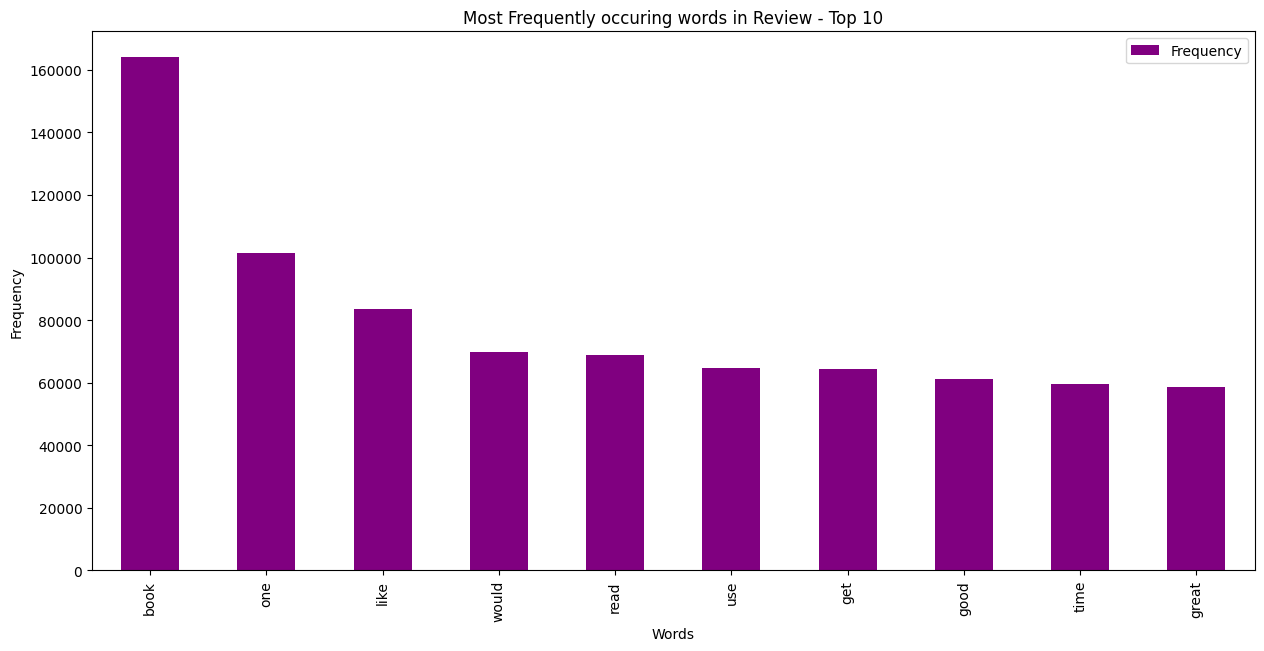

In [45]:
Top10 = Frequency_words_Review[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'purple')
plt.title("Most Frequently occuring words in Review - Top 10")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

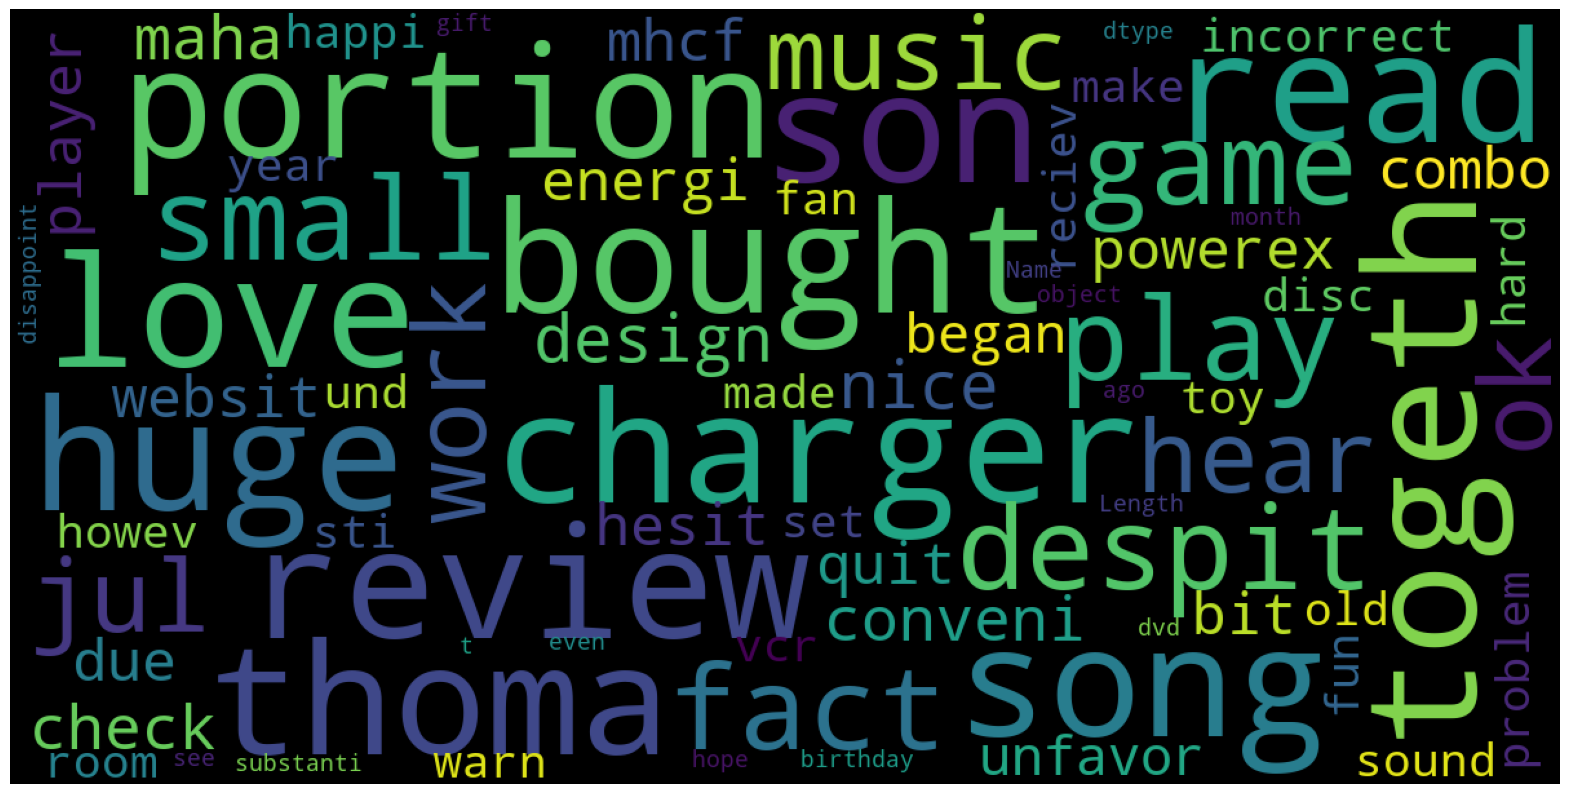

In [46]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Review"])

### Frequency Words in Title

In [47]:
from collections import Counter

words = Counter(' '.join(df['Title'].to_list()).split())
Frequency_words_Title = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words_Title = Frequency_words_Title.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words_Title['Rank'] = Frequency_words_Title['Rank'].apply(lambda x : x+1)
Frequency_words_Title.head(20)

,Rank,Words,Frequency
0,1,great,19890
1,2,book,16448
2,3,good,14519
3,4,best,8898
4,5,one,7514
5,6,read,6747
6,7,work,6532
7,8,love,5921
8,9,buy,5609
9,10,money,5408


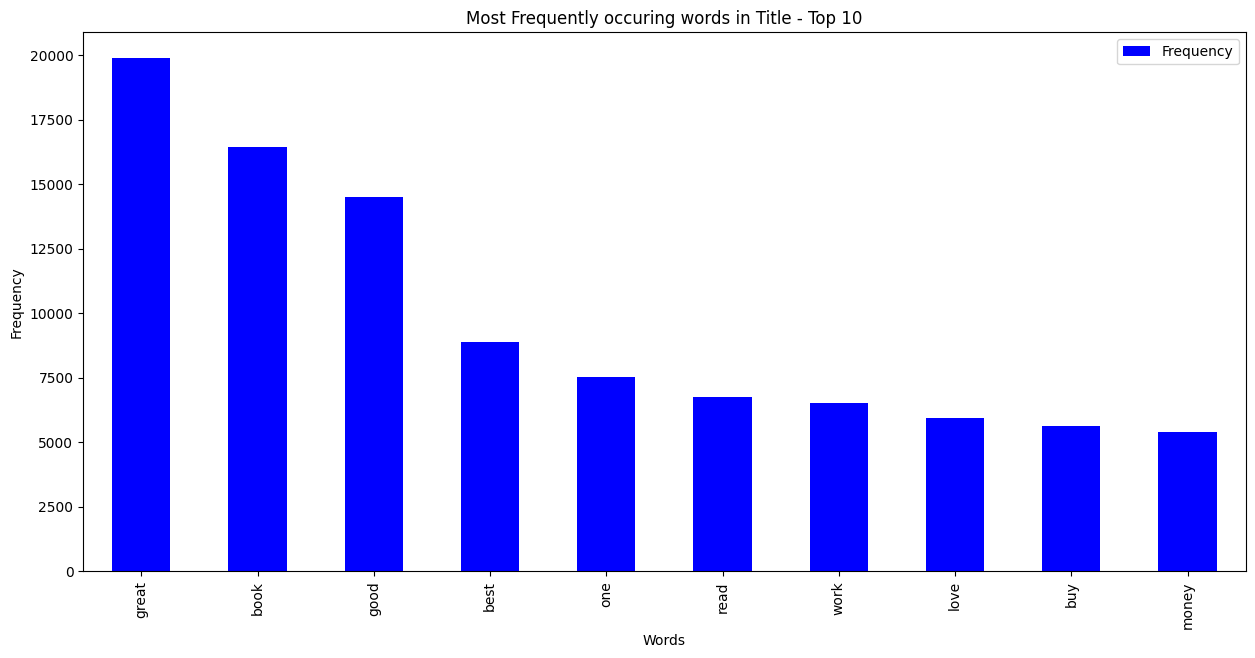

In [48]:
Top10 = Frequency_words_Title[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'blue')
plt.title("Most Frequently occuring words in Title - Top 10")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

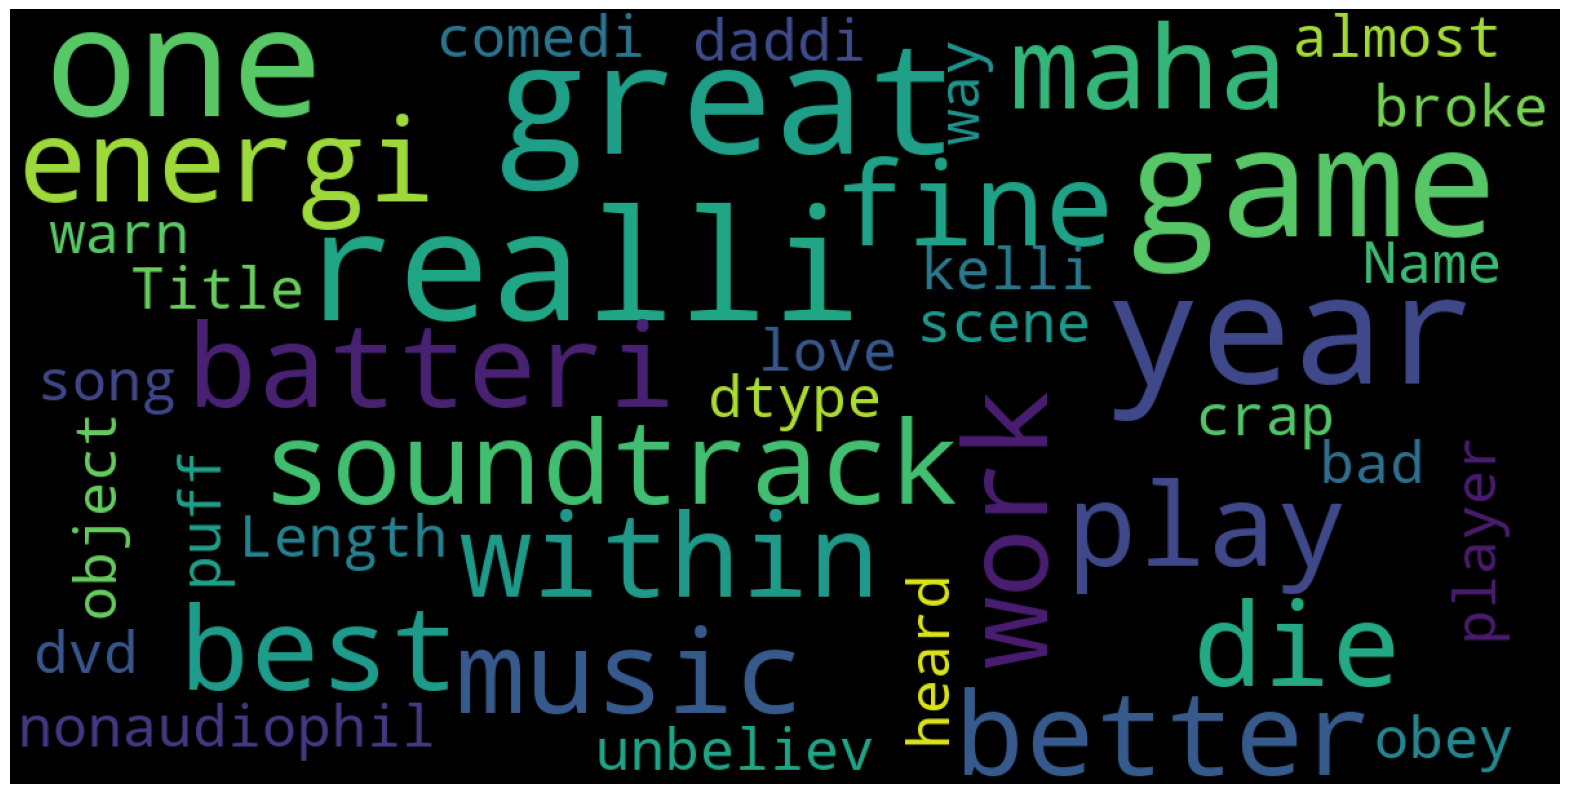

In [49]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Title"])

### Feature extraction - TF-IDF & Data Splitting

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Combine Title and Review 
df['combined_text'] = df['Title'] + ' ' + df['Review']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000) # keeps the top 5000 most important words
X = vectorizer.fit_transform(df['combined_text'])  

# Target label
y = df['Rating']  # 0 = Negative, 1 = Positive

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check the shape of the training and test sets
print(X_train.shape, X_test.shape)

(211919, 5000) (52980, 5000)


## Classification modelling

### Support Vector Machine (SVM)

Test Accuracy: 0.844
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1008
           1       0.86      0.82      0.84       992

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



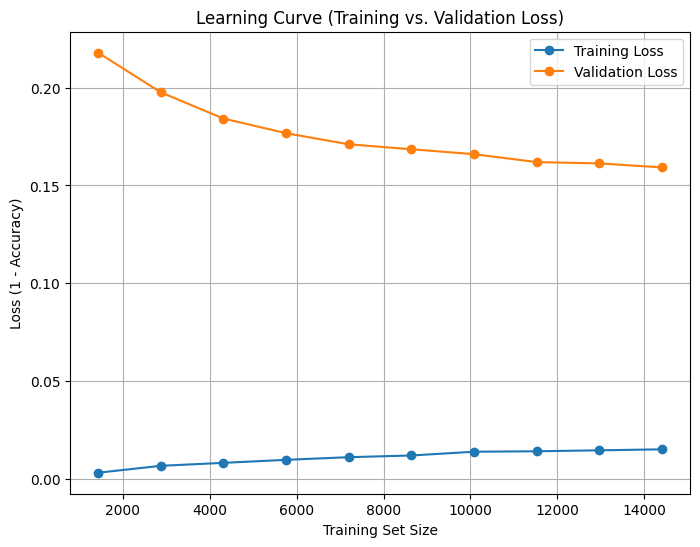

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import learning_curve

# =======================
# Data Preparation
# =======================

data_df = pd.read_csv('clean_data.csv')
data_df = data_df.sample(n=20000, random_state=1).reset_index(drop=True)
data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df = data_df.dropna(subset=['Rating'])
data_df['Rating'] = data_df['Rating'].astype(int)

# Slit between test and train.
train_df = data_df.iloc[:18000].reset_index(drop=True)
test_df = data_df.iloc[18000:].reset_index(drop=True)
for col in ['Title', 'Review']:
    train_df[col] = train_df[col].fillna('').astype(str)
    test_df[col] = test_df[col].fillna('').astype(str)
    
X_train = train_df[['Title', 'Review']]
y_train = train_df['Rating']
X_test = test_df[['Title', 'Review']]
y_test = test_df['Rating']

# =======================
# Pipeline Construction
# =======================

get_title = FunctionTransformer(lambda x: x['Title'], validate=False)
get_review = FunctionTransformer(lambda x: x['Review'], validate=False)
title_pipeline = Pipeline([
    ('selector', get_title),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])
review_pipeline = Pipeline([
    ('selector', get_review),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])
combined_features = FeatureUnion(
    transformer_list=[
        ('title', title_pipeline),
        ('review', review_pipeline)
    ],
    transformer_weights={'title': 0.2, 'review': 0.8}
)
pipeline = Pipeline([
    ('features', combined_features),
    ('svc', SVC())  
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# =======================
# Generate Learning Curve
# =======================

train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X_train, y_train, 
    n_jobs=-1,          
    train_sizes=np.linspace(0.1, 1.0, 10), #  Creates 10 seperate plotting values.
    scoring='accuracy'
)


train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
train_loss = 1 - train_scores_mean
val_loss = 1 - val_scores_mean


# Plot the learning curve.
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', label="Training Loss")
plt.plot(train_sizes, val_loss, 'o-', label="Validation Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Loss (1 - Accuracy)")
plt.title("Learning Curve (Training vs. Validation Loss)")
plt.legend()
plt.grid(True)
plt.show()


### Multinomial Naïve Bayes (MNB)

In [6]:
# =============================
# 📦 Imports
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report

# =============================
# Data Preparation
# =============================

# Load cleaned dataset
data_df = pd.read_csv("clean_data.csv")

# Use a smaller sample for efficiency (adjust as needed)
data_df = data_df.sample(n=20000, random_state=1).reset_index(drop=True)

# Clean the Rating column
data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df = data_df.dropna(subset=['Rating'])
data_df['Rating'] = data_df['Rating'].astype(int)

# Train-test split
train_df = data_df.iloc[:18000].reset_index(drop=True)
test_df = data_df.iloc[18000:].reset_index(drop=True)

# Ensure text columns are strings and fill missing values
for col in ['Title', 'Review']:
    train_df[col] = train_df[col].fillna('').astype(str)
    test_df[col] = test_df[col].fillna('').astype(str)

X_train = train_df[['Title', 'Review']]
y_train = train_df['Rating']

X_test = test_df[['Title', 'Review']]
y_test = test_df['Rating']

# =============================
# Pipeline Setup
# =============================

# Extract Title and Review
get_title = FunctionTransformer(lambda x: x['Title'], validate=False)
get_review = FunctionTransformer(lambda x: x['Review'], validate=False)

# Title pipeline
title_pipeline = Pipeline([
    ('selector', get_title),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

# Review pipeline
review_pipeline = Pipeline([
    ('selector', get_review),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

# Combine both
combined_features = FeatureUnion(
    transformer_list=[
        ('title', title_pipeline),
        ('review', review_pipeline)
    ],
    transformer_weights={
        'title': 0.2,
        'review': 0.8
    }
)

# Final pipeline with Multinomial Naive Bayes
pipeline = Pipeline([
    ('features', combined_features),
    ('mnb', MultinomialNB())
])

## HistGradientBoosting

c:\Users\User\Documents\Coding\Text\.venv\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Test Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       254
           1       0.79      0.83      0.81       246

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



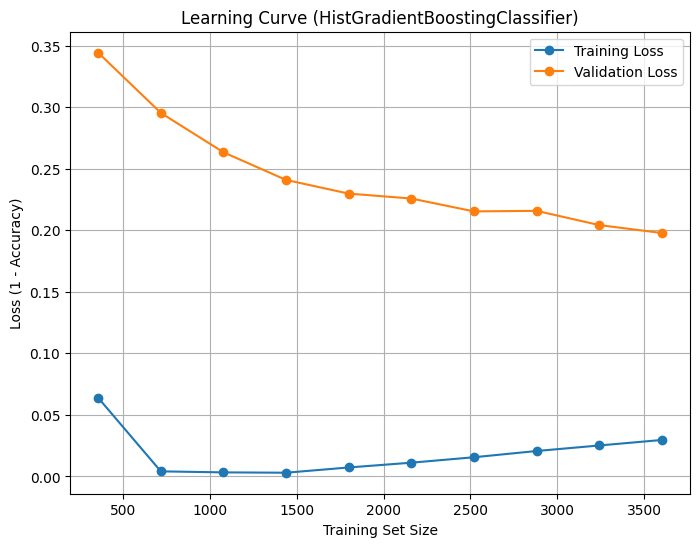

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import learning_curve

# =======================
# Data Preparation
# =======================

data_df = pd.read_csv('clean_data.csv')
data_df = data_df.sample(n=5000, random_state=1).reset_index(drop=True)

data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df = data_df.dropna(subset=['Rating'])
data_df['Rating'] = data_df['Rating'].astype(int)

train_df = data_df.iloc[:4500].reset_index(drop=True)
test_df = data_df.iloc[4500:].reset_index(drop=True)

for col in ['Title', 'Review']:
    train_df[col] = train_df[col].fillna('').astype(str)
    test_df[col] = test_df[col].fillna('').astype(str)

X_train = train_df[['Title', 'Review']]
y_train = train_df['Rating']
X_test = test_df[['Title', 'Review']]
y_test = test_df['Rating']

# =======================
# Pipeline Construction
# =======================

get_title = FunctionTransformer(lambda x: x['Title'], validate=False)
get_review = FunctionTransformer(lambda x: x['Review'], validate=False)

title_pipeline = Pipeline([
    ('selector', get_title),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])
review_pipeline = Pipeline([
    ('selector', get_review),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

combined_features = FeatureUnion(
    transformer_list=[
        ('title', title_pipeline),
        ('review', review_pipeline)
    ],
    transformer_weights={'title': 0.2, 'review': 0.8}
)

to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

pipeline = Pipeline([
    ('features', combined_features),
    ('to_dense', to_dense),
    ('hgb', HistGradientBoostingClassifier())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# =======================
# Learning Curve
# =======================

train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X_train, y_train, 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

train_loss = 1 - train_scores_mean
val_loss = 1 - val_scores_mean

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', label="Training Loss")
plt.plot(train_sizes, val_loss, 'o-', label="Validation Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Loss (1 - Accuracy)")
plt.title("Learning Curve (HistGradientBoostingClassifier)")
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree

Test Accuracy: 0.6795
              precision    recall  f1-score   support

           0       0.63      0.87      0.73      1008
           1       0.79      0.48      0.60       992

    accuracy                           0.68      2000
   macro avg       0.71      0.68      0.67      2000
weighted avg       0.71      0.68      0.67      2000



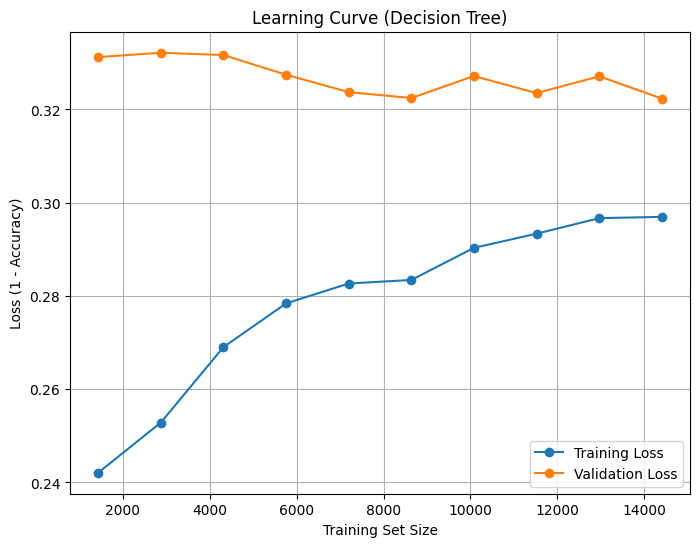

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import learning_curve

# =======================
# Data Preparation 
# =======================

data_df = pd.read_csv('clean_data.csv')

data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df = data_df.dropna(subset=['Rating'])
data_df['Rating'] = data_df['Rating'].astype(int)

data_df = data_df.sample(n=20000, random_state=1).reset_index(drop=True)

train_df = data_df.iloc[:18000].reset_index(drop=True)
test_df = data_df.iloc[18000:].reset_index(drop=True)

for col in ['Title', 'Review']:
    train_df[col] = train_df[col].fillna('').astype(str)
    test_df[col] = test_df[col].fillna('').astype(str)

X_train = train_df[['Title', 'Review']]
y_train = train_df['Rating']
X_test = test_df[['Title', 'Review']]
y_test = test_df['Rating']

# =======================
# Pipeline Construction
# =======================

get_title = FunctionTransformer(lambda x: x['Title'], validate=False)
get_review = FunctionTransformer(lambda x: x['Review'], validate=False)

title_pipeline = Pipeline([
    ('selector', get_title),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])
review_pipeline = Pipeline([
    ('selector', get_review),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

combined_features = FeatureUnion(
    transformer_list=[
        ('title', title_pipeline),
        ('review', review_pipeline)
    ],
    transformer_weights={'title': 0.2, 'review': 0.8}
)

pipeline = Pipeline([
    ('features', combined_features),
    ('tree', DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# =======================
# Learning Curve
# =======================

train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X_train, y_train, 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

train_loss = 1 - train_scores_mean
val_loss = 1 - val_scores_mean

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', label="Training Loss")
plt.plot(train_sizes, val_loss, 'o-', label="Validation Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Loss (1 - Accuracy)")
plt.title("Learning Curve (Decision Tree)")
plt.legend()
plt.grid(True)
plt.show()

## HyperParameter Tunning Selection

### Support Vector Machine 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from tqdm_joblib import tqdm_joblib

# =======================
# Data Preparation
# =======================

data_df = pd.read_csv('clean_data.csv')
data_df = data_df.sample(n=20000, random_state=1).reset_index(drop=True)
data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df = data_df.dropna(subset=['Rating'])
data_df['Rating'] = data_df['Rating'].astype(int)

# Split between test and train.
train_df = data_df.iloc[:18000].reset_index(drop=True)
test_df = data_df.iloc[18000:].reset_index(drop=True)
for col in ['Title', 'Review']:
    train_df[col] = train_df[col].fillna('').astype(str)
    test_df[col] = test_df[col].fillna('').astype(str)
    
X_train = train_df[['Title', 'Review']]
y_train = train_df['Rating']
X_test = test_df[['Title', 'Review']]
y_test = test_df['Rating']

# =======================
# Pipeline Construction
# =======================

get_title = FunctionTransformer(lambda x: x['Title'], validate=False)
get_review = FunctionTransformer(lambda x: x['Review'], validate=False)

title_pipeline = Pipeline([
    ('selector', get_title),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

review_pipeline = Pipeline([
    ('selector', get_review),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

# Create the FeatureUnion with default transformer weights (which will be overwritten by grid search)
combined_features = FeatureUnion(
    transformer_list=[
        ('title', title_pipeline),
        ('review', review_pipeline)
    ],
    transformer_weights={'title': 0.2, 'review': 0.8}
)

pipeline = Pipeline([
    ('features', combined_features),
    ('svc', SVC())
])

# =======================
# Hyperparameter Tuning
# =======================

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],
    'features__transformer_weights': [
        {'title': 0.1, 'review': 0.9},
        {'title': 0.3, 'review': 0.7},
        {'title': 0.5, 'review': 0.5},
        {'title': 0.7, 'review': 0.3},
        {'title': 0.9, 'review': 0.1}
    ]
}

n_candidates = (
    len(param_grid['svc__C']) *
    len(param_grid['svc__kernel']) *
    len(param_grid['svc__gamma']) *
    len(param_grid['features__transformer_weights'])
)

total_fits = n_candidates * 3  
#GridSearchCV with 3-fold cross-validation.
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
with tqdm_joblib(tqdm(total=total_fits, desc="GridSearchCV Progress")):
    grid_search.fit(X_train, y_train)

# =======================
# Evaluation on Test Set
# =======================
# Print cross-validation results for each candidate model.
print("Cross-validation Accuracy for each model:")
cv_results = grid_search.cv_results_
for i, params in enumerate(cv_results['params']):
    mean_accuracy = cv_results['mean_test_score'][i]
    print(f"Parameters: {params} - Accuracy: {mean_accuracy:.4f}")
print("\nBest parameters:", grid_search.best_params_)


y_pred = grid_search.predict(X_test) #Evaluation metrics
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


c:\Users\User\Documents\Coding\Text\.venv\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
GridSearchCV Progress:   0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Cross-validation Accuracy for each model:
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'} - Accuracy: 0.8136
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'} - Accuracy: 0.7624
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'svc__C': 0.1, 'svc__gamma': 'auto', 'svc__kernel': 'linear'} - Accuracy: 0.8136
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'svc__C': 0.1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'} - Accuracy: 0.5106
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'} - Accuracy: 0.8241
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'svc__C': 1, 'svc__gamma': 'scale'

### Multinomial Naïve Bayes 

[learning_curve] Training set sizes: [ 1440  2880  4320  5760  7200  8640 10080 11520 12960 14400]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.7s finished


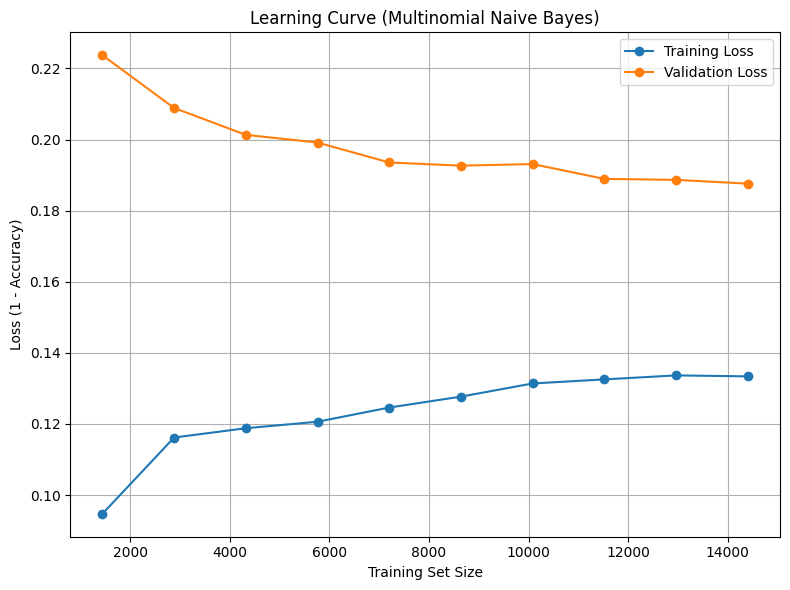


Test Accuracy: 0.8215
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1008
           1       0.84      0.79      0.81       992

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



Grid Search Progress:   0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Cross-validation Accuracy for each model:
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'mnb__alpha': 0.01, 'mnb__fit_prior': True} - Accuracy: 0.7919
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'mnb__alpha': 0.01, 'mnb__fit_prior': False} - Accuracy: 0.7927
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'mnb__alpha': 0.1, 'mnb__fit_prior': True} - Accuracy: 0.7946
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'mnb__alpha': 0.1, 'mnb__fit_prior': False} - Accuracy: 0.7942
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'mnb__alpha': 0.5, 'mnb__fit_prior': True} - Accuracy: 0.7975
Parameters: {'features__transformer_weights': {'title': 0.1, 'review': 0.9}, 'mnb__alpha': 0.5, 'mnb__fit_prior': False} - Accuracy: 0.7974
Parameters: {'features__transformer_weights': {'title': 0

In [7]:
# =============================
# 📦 Imports
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report

# =============================
# Data Preparation
# =============================

# Load cleaned dataset
data_df = pd.read_csv("clean_data.csv")

# Use a smaller sample for efficiency (adjust as needed)
data_df = data_df.sample(n=20000, random_state=1).reset_index(drop=True)

# Clean the Rating column
data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df = data_df.dropna(subset=['Rating'])
data_df['Rating'] = data_df['Rating'].astype(int)

# Train-test split
train_df = data_df.iloc[:18000].reset_index(drop=True)
test_df = data_df.iloc[18000:].reset_index(drop=True)

# Ensure text columns are strings and fill missing values
for col in ['Title', 'Review']:
    train_df[col] = train_df[col].fillna('').astype(str)
    test_df[col] = test_df[col].fillna('').astype(str)

X_train = train_df[['Title', 'Review']]
y_train = train_df['Rating']

X_test = test_df[['Title', 'Review']]
y_test = test_df['Rating']

# =============================
# Pipeline Setup
# =============================

# Extract Title and Review
get_title = FunctionTransformer(lambda x: x['Title'], validate=False)
get_review = FunctionTransformer(lambda x: x['Review'], validate=False)

# Title pipeline
title_pipeline = Pipeline([
    ('selector', get_title),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

# Review pipeline
review_pipeline = Pipeline([
    ('selector', get_review),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

# Combine both
combined_features = FeatureUnion(
    transformer_list=[
        ('title', title_pipeline),
        ('review', review_pipeline)
    ],
    transformer_weights={
        'title': 0.2,
        'review': 0.8
    }
)

# Final pipeline with Multinomial Naive Bayes
pipeline = Pipeline([
    ('features', combined_features),
    ('mnb', MultinomialNB())
])

# =============================
# Generate Learning Curve
# =============================

train_sizes, train_scores, val_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    verbose=1
)

# Compute mean losses
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

train_loss = 1 - train_scores_mean
val_loss = 1 - val_scores_mean

# =============================
# 📊 Plot Learning Curve
# =============================

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', label='Training Loss')
plt.plot(train_sizes, val_loss, 'o-', label='Validation Loss')
plt.xlabel('Training Set Size')
plt.ylabel('Loss (1 - Accuracy)')
plt.title('Learning Curve (Multinomial Naive Bayes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import accuracy_score, classification_report

# 1. Train the pipeline
pipeline.fit(X_train, y_train)

# 2. Predict on test data
y_pred = pipeline.predict(X_test)

# 3. Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from tqdm.auto import tqdm
from tqdm_joblib import tqdm_joblib

# Define the parameter grid
param_grid = {
    'mnb__alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'mnb__fit_prior': [True, False],
    'features__transformer_weights': [
        {'title': 0.1, 'review': 0.9},
        {'title': 0.3, 'review': 0.7},
        {'title': 0.5, 'review': 0.5},
        {'title': 0.7, 'review': 0.3},
        {'title': 0.9, 'review': 0.1}
    ]
}

# Estimate number of combinations
n_candidates = (
    len(param_grid['mnb__alpha']) *
    len(param_grid['mnb__fit_prior']) *
    len(param_grid['features__transformer_weights'])
)
total_fits = n_candidates * 3  # 3-fold CV

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,  # pipeline must end with ('mnb', MultinomialNB())
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy'
)

# Run GridSearchCV with progress bar
with tqdm_joblib(tqdm(desc="Grid Search Progress", total=total_fits)):
    grid_search.fit(X_train, y_train)

# Print cross-validation results for each candidate
print("Cross-validation Accuracy for each model:")
cv_results = grid_search.cv_results_
for i, params in enumerate(cv_results['params']):
    mean_accuracy = cv_results['mean_test_score'][i]
    print(f"Parameters: {params} - Accuracy: {mean_accuracy:.4f}")

# Best parameters
print("\nBest parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


### HistGradientBoosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import learning_curve, GridSearchCV

# =======================
# Data Preparation
# =======================

data_df = pd.read_csv('clean_data.csv')
data_df = data_df.sample(n=5000, random_state=1).reset_index(drop=True)

data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df = data_df.dropna(subset=['Rating'])
data_df['Rating'] = data_df['Rating'].astype(int)

train_df = data_df.iloc[:4500].reset_index(drop=True)
test_df = data_df.iloc[4500:].reset_index(drop=True)

for col in ['Title', 'Review']:
    train_df[col] = train_df[col].fillna('').astype(str)
    test_df[col] = test_df[col].fillna('').astype(str)

X_train = train_df[['Title', 'Review']]
y_train = train_df['Rating']
X_test = test_df[['Title', 'Review']]
y_test = test_df['Rating']

# =======================
# Pipeline Construction
# =======================

get_title = FunctionTransformer(lambda x: x['Title'], validate=False)
get_review = FunctionTransformer(lambda x: x['Review'], validate=False)

title_pipeline = Pipeline([
    ('selector', get_title),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])
review_pipeline = Pipeline([
    ('selector', get_review),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

combined_features = FeatureUnion(
    transformer_list=[
        ('title', title_pipeline),
        ('review', review_pipeline)
    ],
    transformer_weights={'title': 0.2, 'review': 0.8}
)

to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Create the pipeline with HistGradientBoostingClassifier
pipeline = Pipeline([
    ('features', combined_features),
    ('to_dense', to_dense),
    ('hgb', HistGradientBoostingClassifier(random_state=1))
])

# =======================
# Reduced Parameter Grid
# =======================

param_grid = [
    {
        'hgb__learning_rate': [0.05, 0.1],
        'hgb__max_iter': [100, 200],
        'hgb__min_samples_leaf': [10],
        'hgb__max_leaf_nodes': [31],
        'hgb__max_bins': [255],
    },
    {
        'hgb__learning_rate': [0.05, 0.1],
        'hgb__max_iter': [100, 200],
        'hgb__min_samples_leaf': [10],
        'hgb__l2_regularization': [0, 1],
        'hgb__max_leaf_nodes': [31],
        'hgb__max_bins': [255],
    }
]

# =======================
# Grid Search
# =======================

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,       # fewer folds (2 instead of 3) to speed up the process
    verbose=1,
    n_jobs=-1   
)

grid_search.fit(X_train, y_train)

print("Best Score:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)

# =======================
# Final Model Evaluation
# =======================

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# =======================
# Learning Curve
# =======================

#train_sizes, train_scores, val_scores = learning_curve(
#    best_model, X_train, y_train,
#    n_jobs=-1,
#    train_sizes=np.linspace(0.1, 1.0, 10),
#    scoring='accuracy'
#)

#train_scores_mean = np.mean(train_scores, axis=1)
#val_scores_mean = np.mean(val_scores, axis=1)

#train_loss = 1 - train_scores_mean
#val_loss = 1 - val_scores_mean

#plt.figure(figsize=(8, 6))
#plt.plot(train_sizes, train_loss, 'o-', label="Training Loss")
#plt.plot(train_sizes, val_loss, 'o-', label="Validation Loss")
#plt.xlabel("Training Set Size")
#plt.ylabel("Loss (1 - Accuracy)")
#plt.title("Learning Curve (HistGradientBoostingClassifier)")
#plt.legend()
#plt.grid(True)
#plt.show()


c:\Users\User\Documents\Coding\Text\.venv\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best Score: 0.7842222222222222
Best Params: {'hgb__l2_regularization': 1, 'hgb__learning_rate': 0.05, 'hgb__max_bins': 255, 'hgb__max_iter': 200, 'hgb__max_leaf_nodes': 31, 'hgb__min_samples_leaf': 10}
Test Accuracy: 0.804
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       254
           1       0.79      0.81      0.80       246

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



### Decision Tree

Test Accuracy: 0.6795
              precision    recall  f1-score   support

           0       0.63      0.87      0.73      1008
           1       0.79      0.48      0.60       992

    accuracy                           0.68      2000
   macro avg       0.71      0.68      0.67      2000
weighted avg       0.71      0.68      0.67      2000

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': 20, 'tree__min_samples_split': 2}
Best Cross-Validation Accuracy: 0.711888888888889
Test Accuracy (Best Model): 0.7205
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1008
           1       0.75      0.66      0.70       992

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



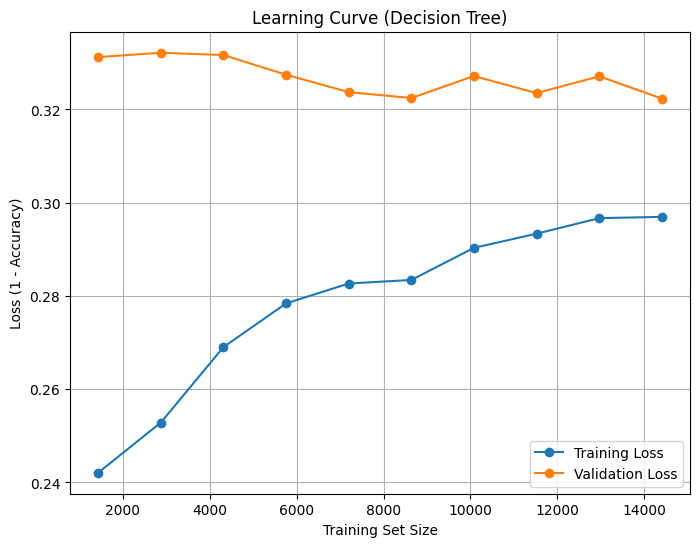

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import learning_curve

# =======================
# Data Preparation 
# =======================

data_df = pd.read_csv('clean_data.csv')

data_df['Rating'] = pd.to_numeric(data_df['Rating'], errors='coerce')
data_df = data_df.dropna(subset=['Rating'])
data_df['Rating'] = data_df['Rating'].astype(int)

data_df = data_df.sample(n=20000, random_state=1).reset_index(drop=True)

train_df = data_df.iloc[:18000].reset_index(drop=True)
test_df = data_df.iloc[18000:].reset_index(drop=True)

for col in ['Title', 'Review']:
    train_df[col] = train_df[col].fillna('').astype(str)
    test_df[col] = test_df[col].fillna('').astype(str)

X_train = train_df[['Title', 'Review']]
y_train = train_df['Rating']
X_test = test_df[['Title', 'Review']]
y_test = test_df['Rating']

# =======================
# Pipeline Construction
# =======================

get_title = FunctionTransformer(lambda x: x['Title'], validate=False)
get_review = FunctionTransformer(lambda x: x['Review'], validate=False)

title_pipeline = Pipeline([
    ('selector', get_title),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])
review_pipeline = Pipeline([
    ('selector', get_review),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5))
])

combined_features = FeatureUnion(
    transformer_list=[
        ('title', title_pipeline),
        ('review', review_pipeline)
    ],
    transformer_weights={'title': 0.2, 'review': 0.8}
)

pipeline = Pipeline([
    ('features', combined_features),
    ('tree', DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ========== Grid Search ==========
from sklearn.model_selection import GridSearchCV

param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [5, 10, 15, 20, None],
    'tree__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy (Best Model):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# =======================
# Learning Curve
# =======================

train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X_train, y_train, 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

train_loss = 1 - train_scores_mean
val_loss = 1 - val_scores_mean

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', label="Training Loss")
plt.plot(train_sizes, val_loss, 'o-', label="Validation Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Loss (1 - Accuracy)")
plt.title("Learning Curve (Decision Tree)")
plt.legend()
plt.grid(True)
plt.show()